In [1]:
#!pip install -U seaborn

In [2]:
# new cell added by JK

# General libraries.
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature preprocessing.
from sklearn import preprocessing

# SK-learn libraries for dimensionality reduction.
from sklearn.decomposition import PCA

# Data analysis and plotting 
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import copy

np.random.seed(0)
print ("OK")
#import tensorflow as tf
#print("Tensorflow version", tf.__version__)

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

OK


# Forest Cover Type Prediction
Team:
   - Diana Chacon
   - Jyoti Kumari
   - Malachy Moran

Date: Aug 01, 2021

We have applied most of the classifiers and algorithms for supervised learning, that we studied during w207 MIDS course, starting from week 1 to week 9. These are listed below in the sequence per week:

- k Nearest Neighbors (week 2)
- Naive Bayes (Week 3)
- Decision trees, including Random Forests, Adaboost and Gradient Boosting (week 4)
- Logistic regression (week 5)
- Stochastic Gradient Descent (week 6)
- Support Vector machine (week 8)


# Table of Contents
1. [Data Loading[](http://)](#[](http://)Data Loading)
2. [Example2](kNN)
3. [Third Example](Decision Trees)
4. [Fourth Example](Logistic Regression)

# Data Description

** new markdown cell added by JK**

**Training datset:**

There are a total of 15120 observations in the training set, that contains 55 features and the Cover_Type.

**Test datset:**

There are a total of 565892 observations in the test set, that contains 55 features. Test dataset has no labels.

**Data Fields:**
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**Explaining the features:**

Without considering the first column, `ID`, The first 10 features of each observation (`Elevation` to `Horizontal_Distance_To_Fire_Points`) are continuous, with different ranges. All 10 features are numeric variables.

while the remaining 44 are all binary. 4 of those 44 binary features correspond to `Wilderness_Area` (i.e., there are 4 possible types), so any observation will have one 1 and three 0's in those columns. 

The last 40 features correspond to the `Soil_Type` (i.e., there are 40 possible types), so any observation will have one 1 and thirty-nine 0's in those columns.

# Data Loading

### Let's load the training and test data

We also discard the 1st variable(`ID`), which does not provide any information about the forest cover type.

In [3]:
# new code cell added by JK
#loading train data
train=pd.read_csv('train.csv')

#loading test data
#test = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

#test_data = test.drop(['Id'], axis = 1) # Dropping first column `Id`. There are no labels in the test data

train_label = train.Cover_Type

train_data = train.drop(['Id', 'Cover_Type'], axis = 1)

print(train.shape)
print(train_data.shape)
print(train_label.shape)
#print(test_data.shape)

(15120, 56)
(15120, 54)
(15120,)


The original train dataset contains 15120 observations with 56 features.(containing both features and the Cover_Type)

  - *The first column has been dropped, since it is not really a feature but more of an observation ID*
 
  - *The last column is the train_label*

**This gives us a train dataset with 15120 observations and 54 features.**

The test dataset contains 565892 observations with the same 55 features 
After dropping the first column `Id`, the final test dataset contains 54 features.

**This gives us a test dataset with 565892 observations and 54 features.**

### Split training data into training and validation data (dev)

*To evaluate our performance, we'll split the training set in 2 subsets: training data (67%) and development or validation data (33%).*

*Test data must not be used to validate the models, because it introduces bias. Test data must be looked at just once in the whole model building process. Looking at test data multiple times introduces bias and we end up learning the error rate on test data beforehand and try to tweak the training parameters, which is not recommended.*

In [4]:
# new code cell added by JK
# Shuffle the data, but make sure that the features and accompanying labels stay in sync.

np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_data.shape[0]))
#train_data = train_data.iloc[shuffle,:]
train_data, train_label = train_data.iloc[shuffle], train_label.iloc[shuffle]

# Split into train (67%) and dev (33%)

train_data, dev_data, train_label, dev_label = train_test_split(train_data, train_label, train_size=0.67)

print(train_data.shape)
print(train_label.shape)
print(dev_data.shape)
print(dev_label.shape)

(10130, 54)
(10130,)
(4990, 54)
(4990,)


# Exploratory Data Analysis

In [5]:
all_data=pd.read_csv('train.csv')

print(all_data.head())

all_data.columns

   Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
0            221             232            148  ...            0   
1            220          

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [6]:
#Looking for the total number of unique values by column
all_data.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [7]:
#Checking for any na values
all_data.isna().sum()
#Result says we have none

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
#looking for outliers or miscoded values
all_data.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


The next thing we should examine is the distribution of our variable of interest, 'Cover_Type' in the data set.

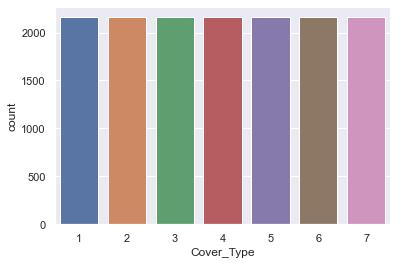

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Cover_Type", data=all_data)

It looks like there is a perfectly even distribution of 'Cover_Type' in our data. This is ideal, as it means we have an equal number of examples for each of our data types, allowing us to avoid a situation where one type in particular is predicted poorly due to a lack of examples.

The next thing for us to examine is the distribution of our feature variables across the target variable. This should allow us some insight into which variables might be useful for prediction.

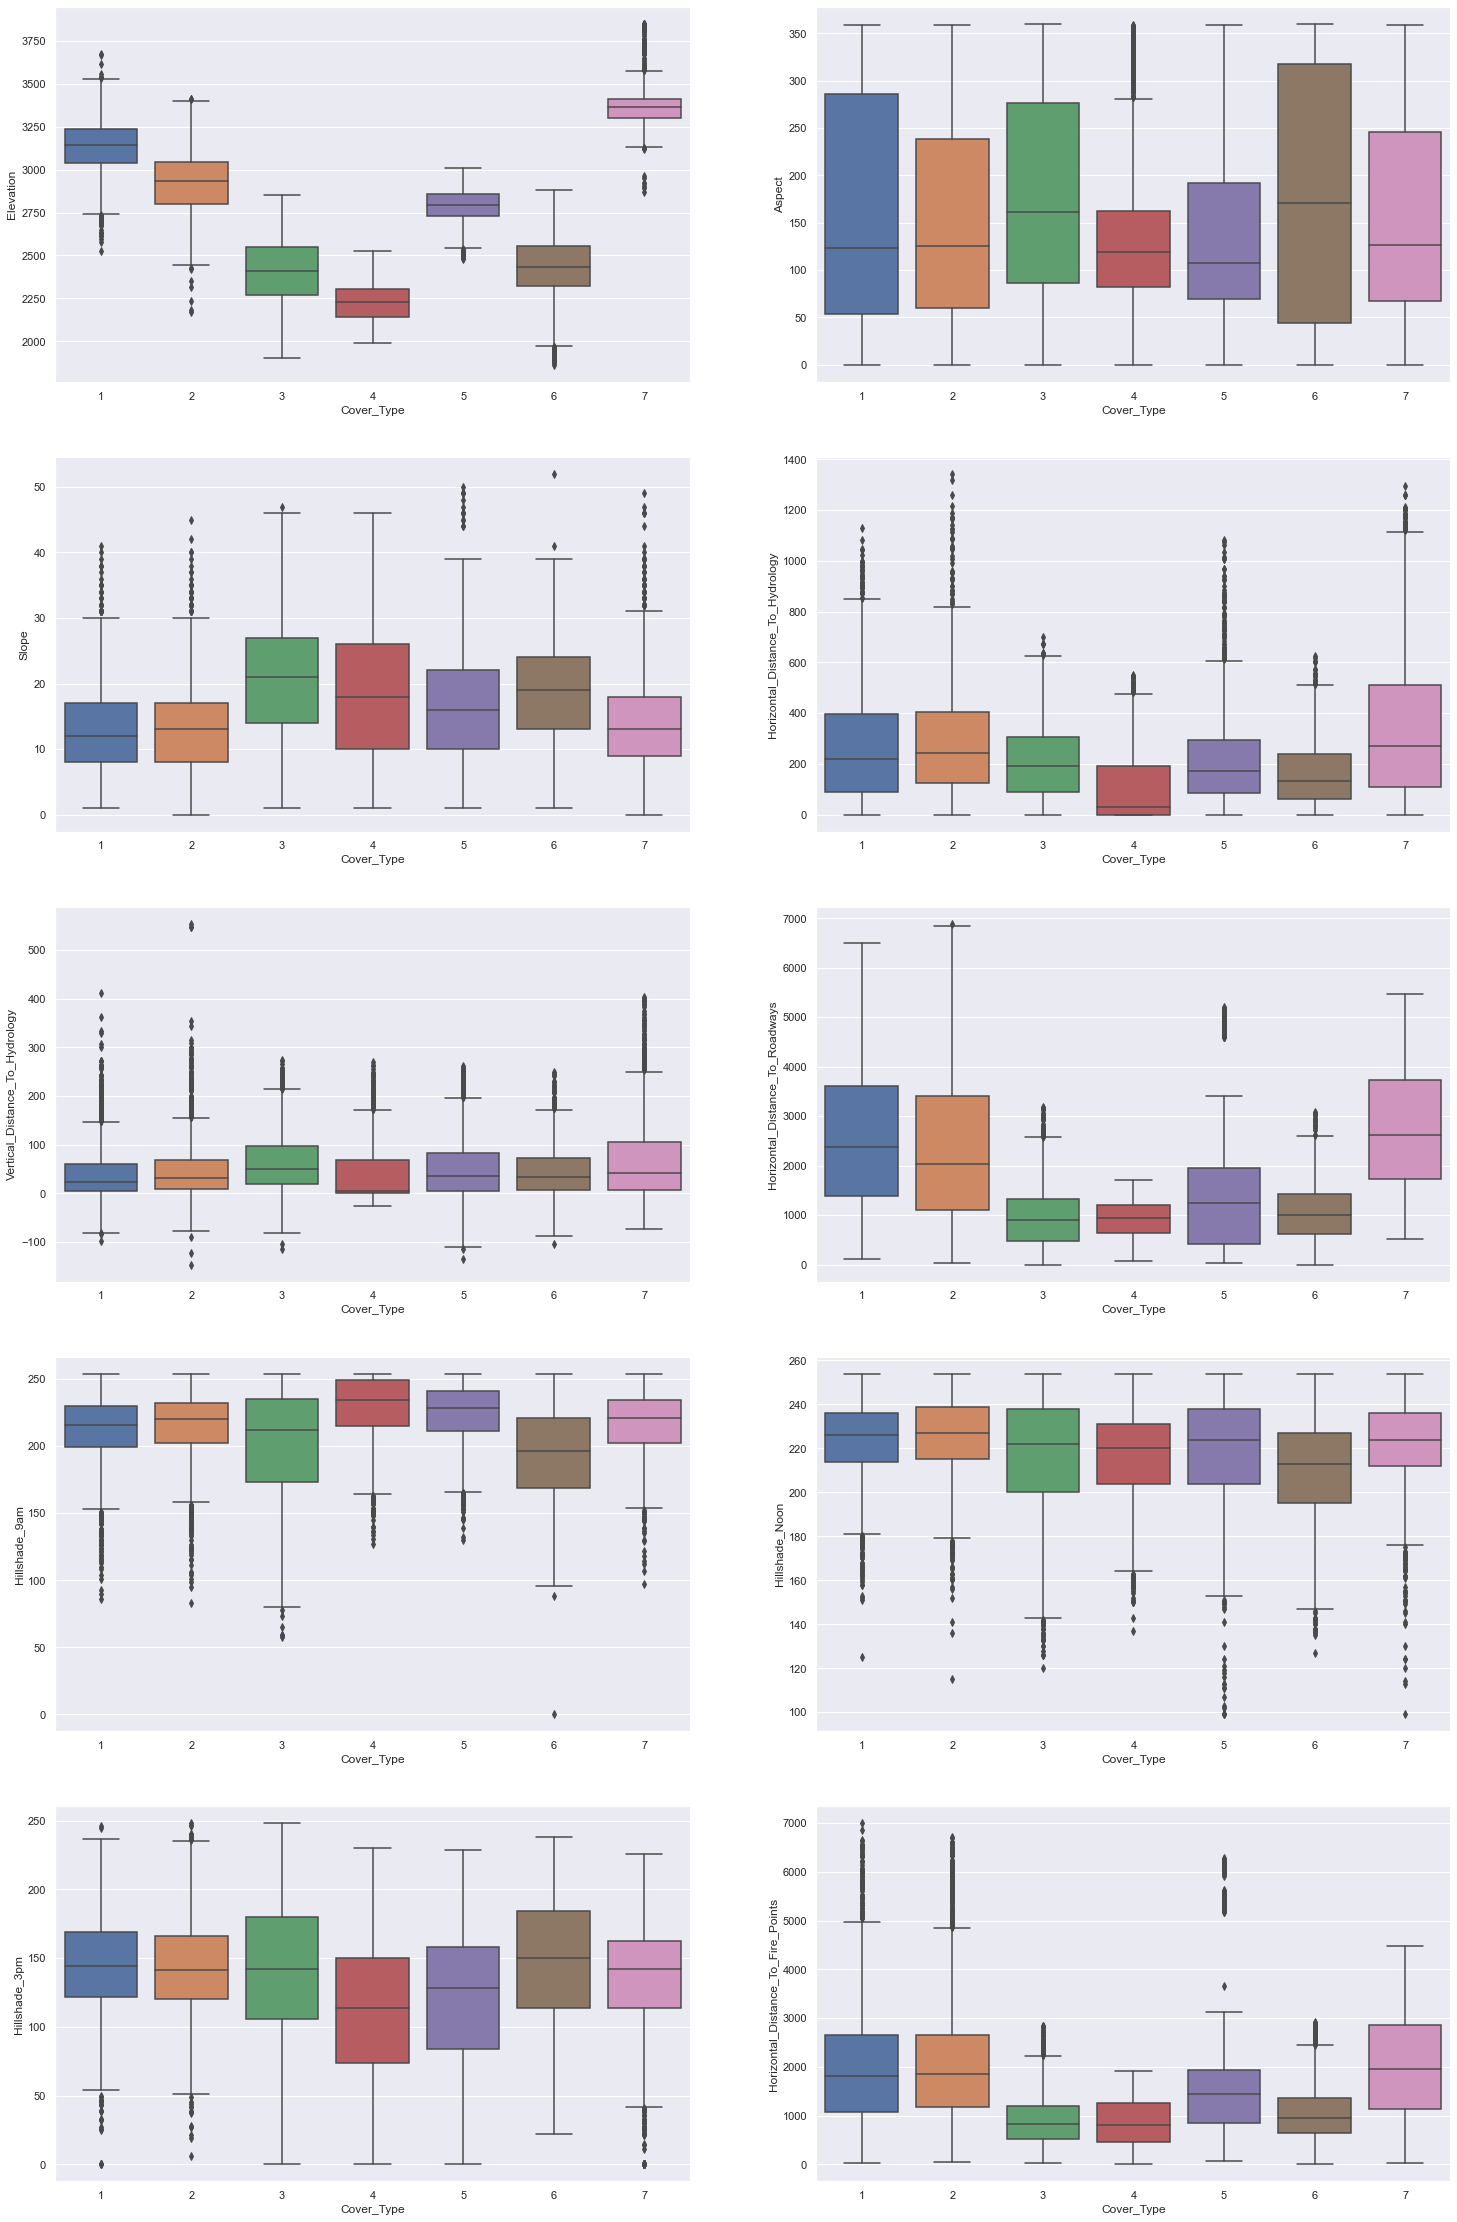

In [10]:
#Next lets look at the distribution of the numeric variables across cover types.
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.boxplot(x="Cover_Type", y=all_data.columns[i+1], data=all_data,ax=ax1);

As we can see from the boxplots above, many of our continuous variables have a very similar distribution across cover types. The only one that stands out by eye is "Elevation", which appears to vary quite differently by each cover type.

Another important piece to examine is the correlation of each of the continuous explanatory variables with each other. Too high of a correlation, or even a perfect correlation, between too many features could be problematic for our model.

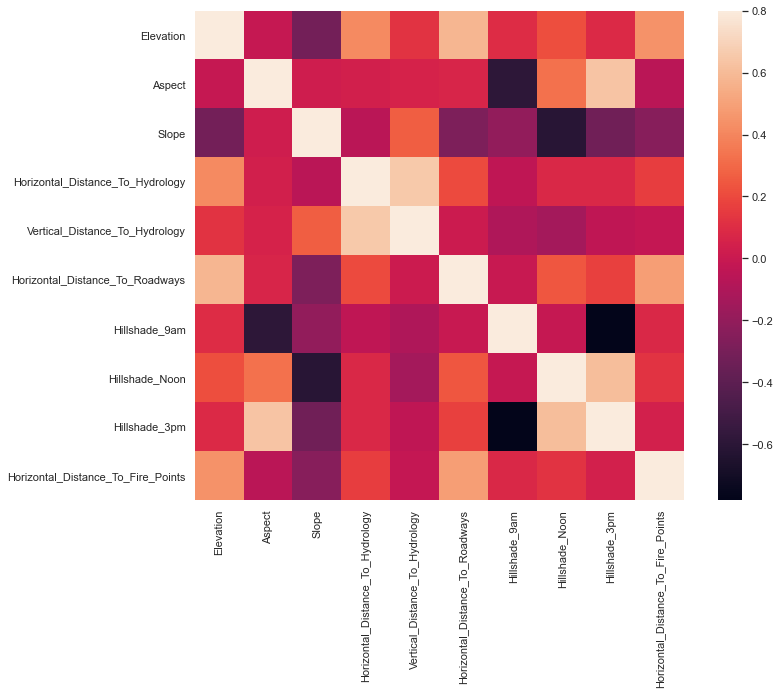

In [11]:
#let's look at the numeric predictor variables and see which are correlated
correlations = all_data.iloc[:,1:11].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlations, vmax=.8, square=True);

It looks like there are some variables that are highly correlated. Many of them make intuitive sense. For example, Slope and Hillshade at noon are highly correlated. This makes sense, as the slope of a hill will have a direct impact on the shade when the sun is directly overhead. Likewise, Aspect (also known as the direction the hill is facing) is highly correlated with shade in the morning and evening. When the sun is low in the sky on either side, east or west facing slopes will have very different amounts of shade.

Luckily for us it appears that nothing has a perfect correlation, which could adversely affect something like a regression model, but the high correlation between these variables may make them less useful when fitting our classifiers.

Finally we need to look at our categorical variables. We will plot each of the 3 groups of categorical variables (Cover Type, Soil Type and Wilderness Area) against each other to look for any patterns.

0        Soil_Type29
1        Soil_Type29
2        Soil_Type12
3        Soil_Type30
4        Soil_Type29
            ...     
15115     Soil_Type4
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type2
Length: 15120, dtype: object


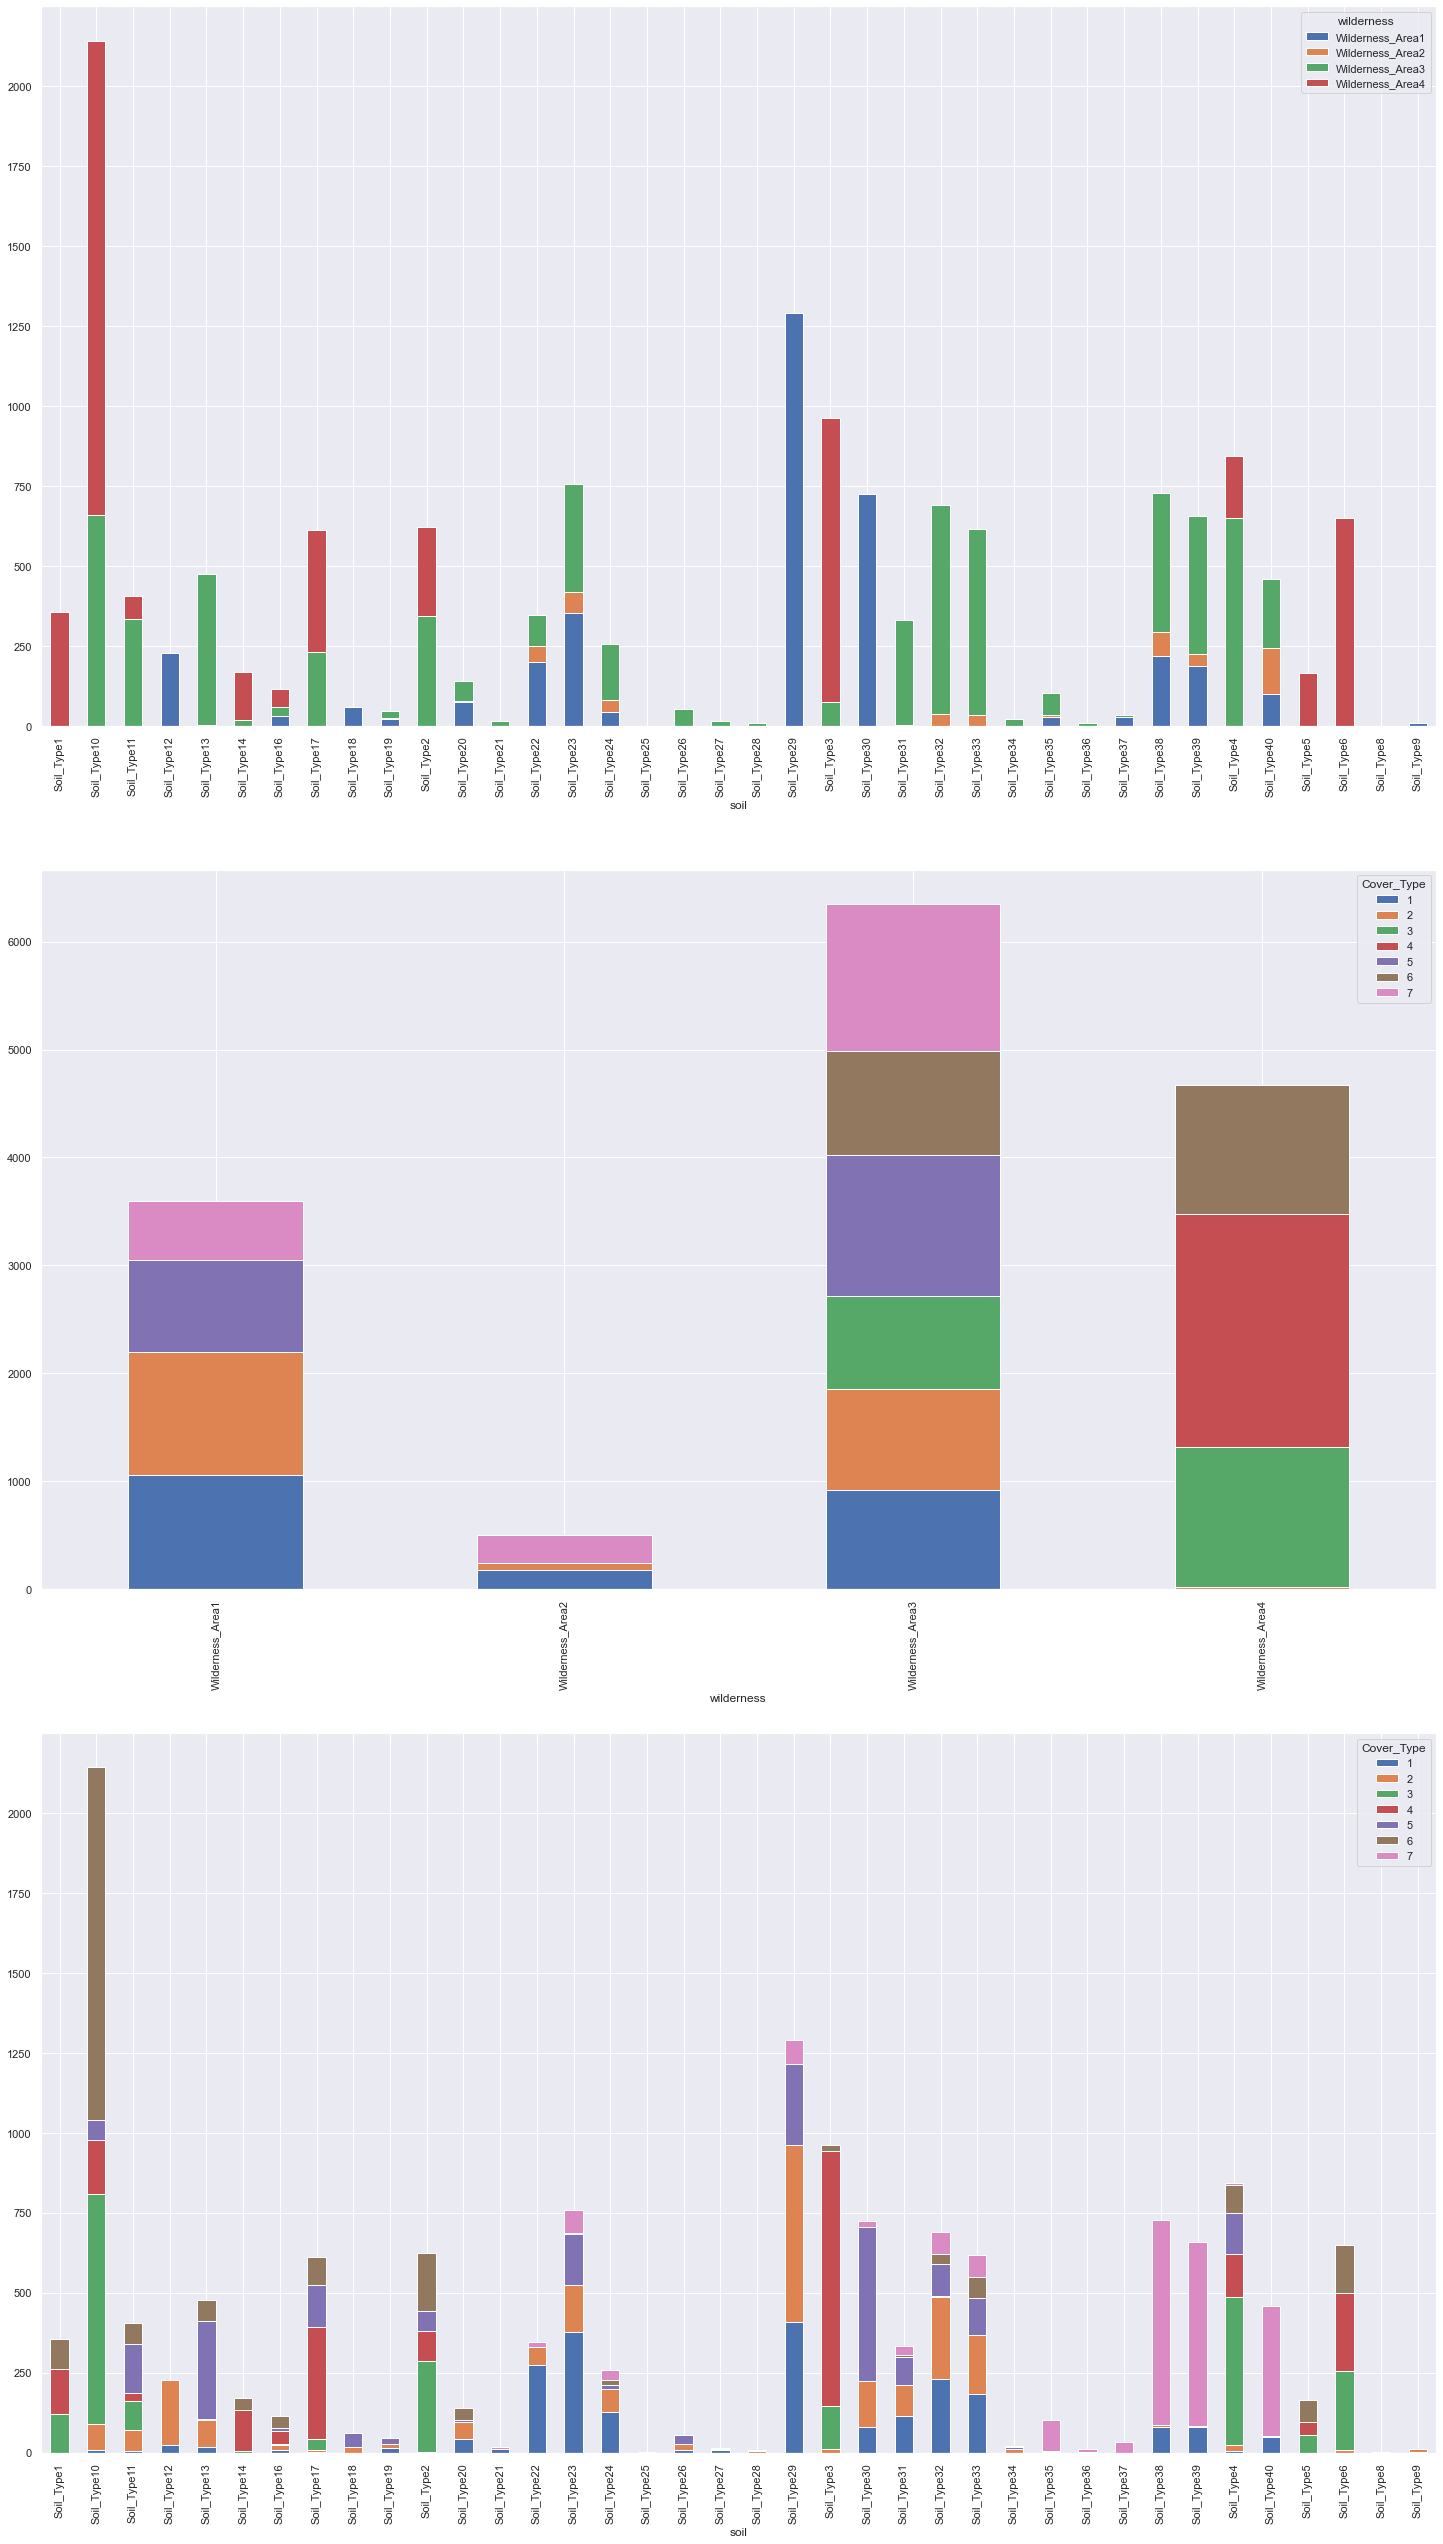

In [12]:
soil_type = all_data.iloc[:,15:55]
soil_type = pd.DataFrame(soil_type)
soil_col = pd.Series(soil_type.columns[np.where(soil_type == 1)[1]])
print(soil_col)

wild_type = all_data.iloc[:,11:15]
wild_type = pd.DataFrame(wild_type)
wild_col = pd.Series(wild_type.columns[np.where(wild_type == 1)[1]])

import copy

plot_data = copy.deepcopy(all_data)
plot_data['soil'] = soil_col
plot_data['wilderness'] = wild_col

fig, axes = plt.subplots(nrows = 3,ncols = 1,figsize = (25,45))

ax1 = axes[0]
pd.crosstab(plot_data.soil, plot_data.wilderness).plot.bar(stacked = True, ax = ax1)

ax2 = axes[1]
pd.crosstab(plot_data.wilderness, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax2)

ax3 = axes[2]
pd.crosstab(plot_data.soil, plot_data.Cover_Type).plot.bar(stacked = True, ax = ax3)

There are absolutely some striking and promising patterns in this data. Firstly we see that some soil types and wilderness areas are mutually exclusive, with certain soils only appearing in certain areas. Likewise, we see that certain cover types are completely absent from certain soil types or wilderness areas. This should mean that these variables will be strongly indicative of what cover type we can expect.

**new markdown cell by JK**

In order to make continuous variable comparable to the binary features, we will be using `preprocessing.MinMaxScaler`, to standardize them by scaling each feature to a given range; [0,1].
This can help in `Logistic regression` model and `kNN` model.

We also use `preprocessing.StandardScaler`, to standardize 10 continuous feature by moving the mean and scaling to unit variance),

With scaled features, there is no surity that the model results will improve, although it is mandatory in this case, since the dataset is a combination of continuous and binary features.

In [13]:
#new cell added by JK
# Scale to mean = 0, sd = 1 using StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std_scaler = preprocessing.StandardScaler()

train_data_std = copy.deepcopy(train_data)
dev_data_std = copy.deepcopy(dev_data)
#test_data_std = copy.deepcopy(test_data)

# only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_std.iloc[:, :10] = std_scaler.fit_transform(train_data_std.iloc[:, :10])
dev_data_std.iloc[:, :10] = std_scaler.transform(dev_data_std.iloc[:, :10])
#test_data_std.iloc[:, :10] = std_scaler.transform(test_data_std.iloc[:, :10])

# Scale to range [0,1] using MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

train_data_minmax = copy.deepcopy(train_data)
dev_data_minmax = copy.deepcopy(dev_data)
#test_data_minmax = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_minmax.iloc[:, :10] = min_max_scaler.fit_transform(train_data.iloc[:, :10])
dev_data_minmax.iloc[:, :10] = min_max_scaler.transform(dev_data.iloc[:, :10])
#test_data_minmax.iloc[:, :10] = min_max_scaler.transform(test_data.iloc[:, :10])

# Feature Binarization is the process of thresholding numerical features to get boolean values,(first 10 columns in the train_data, dev_data and test_data, since they are non-binary features)
# Binarize feature values to either 0 or 1, using binarizer
binarizer = preprocessing.Binarizer()

train_data_b = copy.deepcopy(train_data)
dev_data_b = copy.deepcopy(dev_data)
#test_data_b = copy.deepcopy(test_data)

# Only for the continuous features (first 10 columns in the train_data, dev_data and test_data)
train_data_b.iloc[:, :10] = binarizer.fit_transform(train_data.iloc[:, :10])
dev_data_b.iloc[:, :10] = binarizer.transform(dev_data.iloc[:, :10])
#test_data_b.iloc[:, :10] = binarizer.transform(test_data.iloc[:, :10])

print(train_data_b.shape)
#print(train_data_b.head())


(10130, 54)


# k-Nearest Neighbors(kNN)

JK

*Let's run an experiment with Nearest Neighbors classifier, using fit() and predict() methods from the sklearn classifier implementations.*

In [14]:
#JK
# Estimate by cross-validation of the optimal number of neighbors (k)
# Try between 1 and the number of features (54)
#k = {'n_neighbors': np.concatenate([np.arange(1, train_data.shape[1]+1)]).tolist()}
# The optimal value is low, so let's narrow the search from 1 to 11
k = {'n_neighbors': np.concatenate([np.arange(1, 10+1)]).tolist()}
best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(train_data, train_label)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print ('The optimal value for k is {0}'.format(optimal_k))

The optimal value for k is 1


In [15]:
#JK
# first approach of finding kNN with different data manipulations
kNN = KNeighborsClassifier(n_neighbors=optimal_k)

kNN.fit(train_data, train_label)
print ('Accuracy using non-scaled data:      {0:.4f}'.format(kNN.score(dev_data, dev_label)))

kNN.fit(train_data_std, train_label)
print ('Accuracy using standardized data:    {0:.4f}'.format(kNN.score(dev_data_std, dev_label)))

kNN.fit(train_data_minmax, train_label)
print ('Accuracy using scaled-to-range data: {0:.4f}'.format(kNN.score(dev_data_minmax, dev_label)))

Accuracy using non-scaled data:      0.8357
Accuracy using standardized data:    0.7974
Accuracy using scaled-to-range data: 0.8058


As we can see, the model performed better with non-scaled data, although the optimal k was searched above using non-scaled data, if we calculate optimal-k even with standardized or scale_to_range data, it gives the same result.

**We will proceed with the accuracy result from kNN as our baseline and will try to meet or improve the baseline using different classifiers below.**

In [16]:
#JK
# second approach of finding kNN without finding the optimal value first
#Here are our K values to try
k_values = [1, 3, 5, 7, 9]

for i in k_values:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(train_data.iloc[:, :10], train_label)
    #clf.fit(train_data, train_label)
    # Predict on the dev data
    preds = clf.predict(dev_data.iloc[:, :10])
    #preds = clf.predict(dev_data)

    # And calculate the accuracy by comparing it to the labels
    correct, total = 0, 0
    for pred, label in zip(preds, dev_label):
        if pred == label: 
            correct += 1
        total += 1

    # Finally we print the outcomes
    Outcome = ["For the model with", str(i), "Nearest Neighbors:"]
    print(" ".join(Outcome))
    print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))
    print()

For the model with 1 Nearest Neighbors:
total: 4990  correct: 4170  accuracy: 0.84

For the model with 3 Nearest Neighbors:
total: 4990  correct: 4061  accuracy: 0.81

For the model with 5 Nearest Neighbors:
total: 4990  correct: 3980  accuracy: 0.80

For the model with 7 Nearest Neighbors:
total: 4990  correct: 3928  accuracy: 0.79

For the model with 9 Nearest Neighbors:
total: 4990  correct: 3858  accuracy: 0.77



# Decision Tree

Decision trees are powerful machine learning algorithms that iteratively split the data based on binary 'Yes/No' decision criterion. This has the advantage of both working well with data that is already highly binary, such as our "Wilderness Area" and "Soil Type" variables, and being explainable to non-technical audiences. 

In order to properly utilize the Decision Tree Algorithm, our first task is to binarize all the columsn in the data. For most of our variables, this is fairly easy, as they are already structured as binary indicator variables. For our remaining numeric variables, we need to look at the distribution of our data to see if there are natural breakpoints we can utilize.

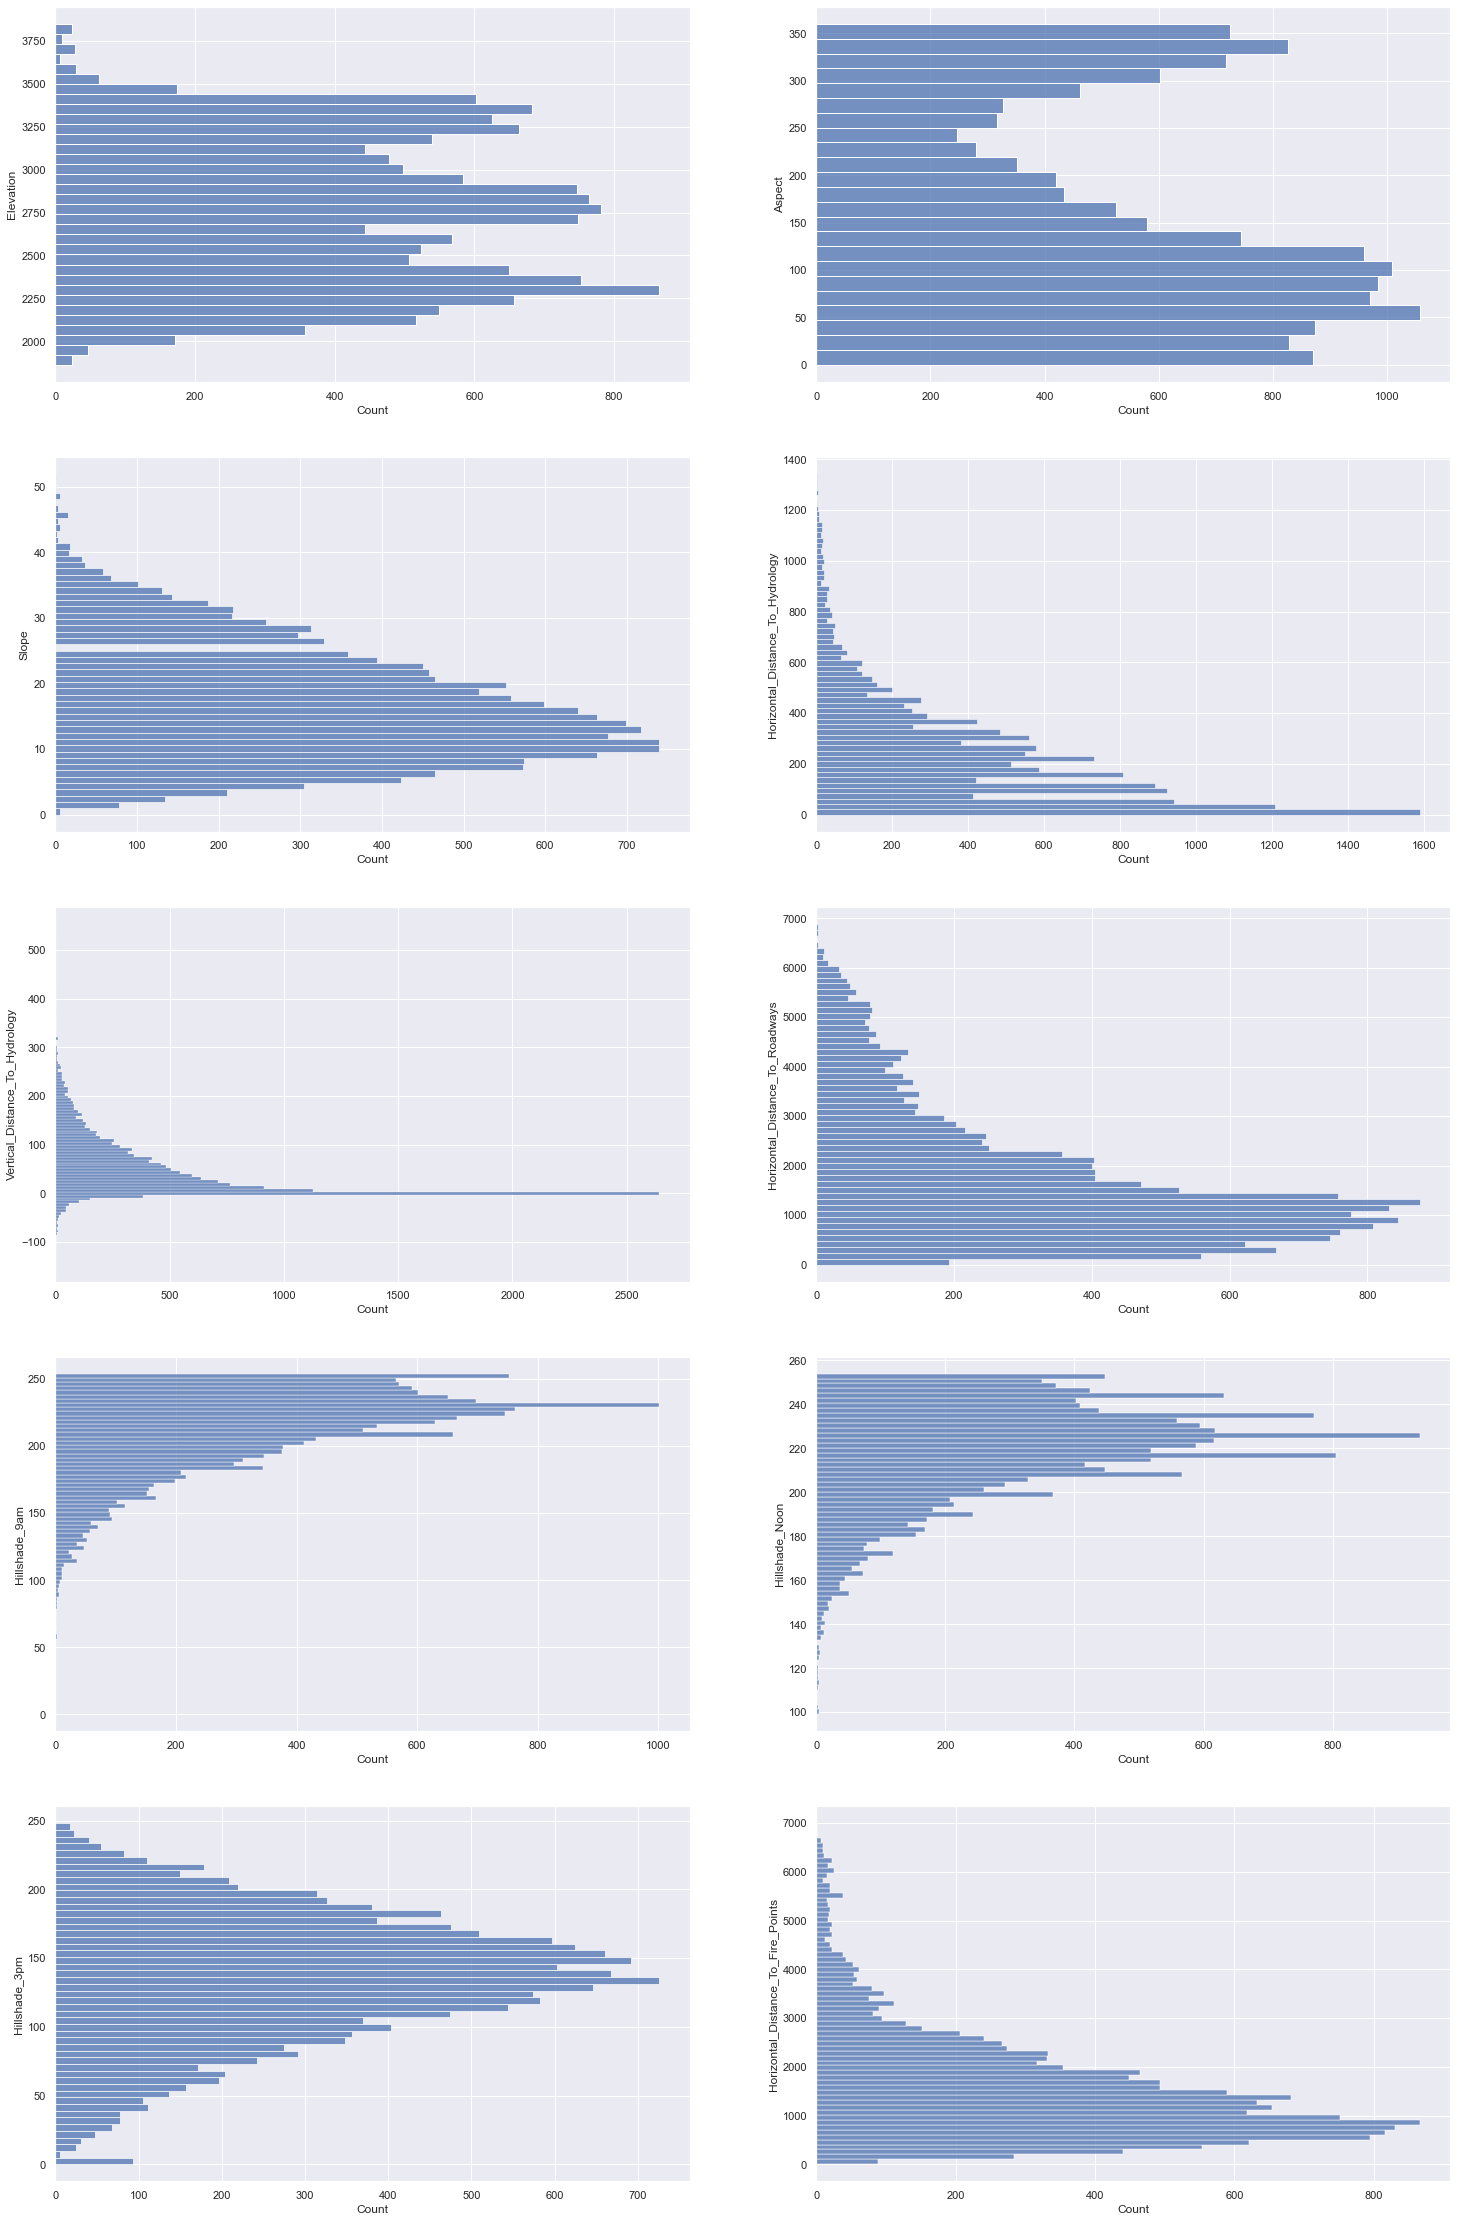

In [17]:
#Creating our plot grid
plotcount=10
fig, axes = plt.subplots(nrows = 5,ncols = 2,figsize = (25,40))
#Plotting our variables
for i in range(0,plotcount):
    row = i // 2
    col = i % 2
    ax1 = axes[row, col]
    sns.histplot(y=all_data.columns[i+1], data=all_data,ax=ax1);

It looks like some of our variables have obvious breakpoints, while others have a fairly smooth distribution.

The variables with obvious breakpoints are:
* Elevation: Elevation looks to have 3 groups, one from 0 to about 2625, one from 2625 to 3125 and one for 3125 and above
* Aspect: Aspect seems to be split into two groups right at 250
* Slope: Slope has a gap at 26 degrees. We can try breaking here
* Horizontal_Distance_To_Hydrology: This seems to have a large amount of data below 100 feet, and a long tail above that
* Vertical_Distance_To_Hydrology: This feature seems to have an overwhelming amount of the data at exactly 0, so we will split it there

The other variables: Horizontal_Distance_To_Roadways, the Hillshade variables, and Horizontal_Distance_To_Fire_Points seem to have a fairly smooth distribution. Luckily, since we know the criterion that a decision tree will split on (information gain), we can choose to binarize our continuous variables at those points which maximize this criterion.


In [18]:
#First we will create a copy of our data that we can modify
tree_train_data = copy.deepcopy(train_data)
tree_train_labels = copy.deepcopy(train_label)
tree_dev_data = copy.deepcopy(dev_data)
tree_dev_labels = copy.deepcopy(dev_label)

In [19]:

###This block of four functions work together to find the point each variable can be split to maximize information gain.

def entropy(distribution):
    #initialize entropy at zero
    h = 0.0
    for probability in distribution:
        logprob = -100.0  # log(0) = -inf so let's approximate it with -100 to avoid an error
        if probability > 0.0: logprob = np.log2(probability)
        h -= probability * logprob
    return h

def get_label_distribution(labels):
    # Initialize counters for all labels to zero.
    label_probs = np.array([0.0 for i in range(7)])

    # Iterate over labels in the training data and update counts.
    for label in labels:
        label_probs[label-1] += 1.0
    
    # Normalize to get a distribution.
    label_probs /= label_probs.sum()
    return label_probs

def information_gain(data, labels, feature, threshold=0):
    # Get the initial entropy of the label distribution.
    initial_entropy = entropy(get_label_distribution(labels))
    
    # subset0 will contain the labels for which the feature is 0 and
    # subset1 will contain the labels for which the feature is 1.
    subset0, subset1 = [], []
    for datum, label in zip(data, labels):
        if datum[feature] > threshold: subset1.append(label)
        else: subset0.append(label)
    
    # Compute the entropy of each subset.
    subset0_entropy = entropy(get_label_distribution(subset0))
    subset1_entropy = entropy(get_label_distribution(subset1))
    
    # Compute the final entropy by weighting each subset's entropy according to its size.
    subset0_weight = 1.0 * len(subset0) / len(labels)
    subset1_weight = 1.0 * len(subset1) / len(labels)
    final_entropy = subset0_weight * subset0_entropy + subset1_weight * subset1_entropy
    
    # Finally, compute information gain as the difference between the initial and final entropy.
    return initial_entropy - final_entropy

def try_features_and_thresholds(x, y, emptylist = []):
    #This function is what actually tries the different threshold values and chooses the best one
    data = x.to_numpy()
    labels = y.to_numpy()
    for feature in range(data.shape[1]):
        # Choose a set of thresholds between the min- and max-valued feature, ignoring the min and max themselves.
        thresholds = np.linspace(data[:,feature].min(), data[:,feature].max(), 102)[1:-1]

        # Try each threshold and keep track of the best one for this feature.
        best_threshold = 0
        best_ig = 0
        for threshold in thresholds:
            ig = information_gain(data, labels, feature, threshold)
            if ig > best_ig:
                best_ig = ig
                best_threshold = threshold

        # Show the best threshold and information gain for this feature.
        print ('%d %.3f %.3f %s' %(feature, best_threshold, best_ig, x.columns[feature]))
        emptylist.append(best_threshold)
    return emptylist

#Now we run it on our model to get the best thresholds to binarize each variable
bestcutoffs = try_features_and_thresholds(tree_train_data.iloc[:,0:10], tree_train_labels)

0 2688.861 0.734 Elevation
1 255.921 0.032 Aspect
2 18.020 0.077 Slope
3 38.436 0.094 Horizontal_Distance_To_Hydrology
4 6.475 0.040 Vertical_Distance_To_Hydrology
5 1579.881 0.268 Horizontal_Distance_To_Roadways
6 173.525 0.065 Hillshade_9am
7 200.287 0.032 Hillshade_Noon
8 83.485 0.050 Hillshade_3pm
9 1899.842 0.178 Horizontal_Distance_To_Fire_Points


Now that we've found the appropriate cutoffs for each of our continuous variables, we can turn them into binary indicators. It's important that we do this precisely and specifically, since we will need to binarize our test data exactly the same way (rather than by recalculating what the best entropy points are for the test data). This keeps us from incorrectly fitting our model.

In [20]:
def binarize_data_for_tree(x):
    #Now we will create our elevation features, dividing it up into two sections with two new column
    x["Elevation_high"] = np.where(x["Elevation"] > bestcutoffs[0], 1, 0)
    x.drop("Elevation", axis = 1, inplace = True)

    #Next we create our aspect feature
    x["Aspect_high"] = np.where(x["Aspect"] > bestcutoffs[1] , 1, 0)
    x.drop("Aspect", axis = 1, inplace = True)

    #Our slope feature
    x["Slope_high"] = np.where(x["Slope"] > bestcutoffs[2], 1, 0)
    x.drop("Slope", axis = 1, inplace = True)

    #Our Horizontal distance to hydrology feature
    x["Horizon_Dist_Hydrology_high"] = np.where(x["Horizontal_Distance_To_Hydrology"] > bestcutoffs[3], 1, 0)
    x.drop("Horizontal_Distance_To_Hydrology", axis = 1, inplace = True)

    #Our Vertical distance to hydrology feature
    x["Vert_Dist_Hydrology_high"] = np.where(x["Vertical_Distance_To_Hydrology"] > bestcutoffs[4] , 1, 0)
    x.drop("Vertical_Distance_To_Hydrology", axis = 1, inplace = True)

    #Variables split on the mean
    x["Horizon_Dist_Road_high"] = np.where(x["Horizontal_Distance_To_Roadways"] > bestcutoffs[5], 1, 0)
    x.drop("Horizontal_Distance_To_Roadways", axis = 1, inplace = True)

    x["Hillshade_9am_high"] = np.where(x["Hillshade_9am"] > bestcutoffs[6], 1, 0)
    x.drop("Hillshade_9am", axis = 1, inplace = True)

    x["Hillshade_Noon_high"] = np.where(x["Hillshade_Noon"] > bestcutoffs[7], 1, 0)
    x.drop("Hillshade_Noon", axis = 1, inplace = True)

    x["Hillshade_3pm_high"] = np.where(x["Hillshade_3pm"] > bestcutoffs[8], 1, 0)
    x.drop("Hillshade_3pm", axis = 1, inplace = True)

    x["Horizon_Dist_Fire_high"] = np.where(x["Horizontal_Distance_To_Fire_Points"] > bestcutoffs[9], 1, 0)
    x.drop("Horizontal_Distance_To_Fire_Points", axis = 1, inplace = True)
    

binarize_data_for_tree(tree_train_data)
binarize_data_for_tree(tree_dev_data)
    
#Checking our data
print(tree_train_data.head())
print(tree_dev_data.head())

       Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
5197                  1                 0                 0                 0   
12430                 1                 0                 0                 0   
12094                 1                 0                 0                 0   
14569                 0                 0                 1                 0   
2164                  0                 0                 0                 1   

       Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
5197            0           0           0           0           0           0   
12430           0           0           0           0           0           0   
12094           0           0           0           0           0           0   
14569           0           0           0           0           0           0   
2164            0           0           0           0           0           0   

       ...  Elevation_high

Once we have succressfully binarized our data, we can attempt to fit a single decision tree classifier to make predictions. The two main hyper parameters to be concerned with in a Decision Tree Classifier are the minimum number of samples we require in order to perform a split and the maximum depth of the tree. As noted in the KNN section, we can use the Grid Search Cross-Validation to choose the best parameters for us.

In [21]:
#Setting up our grid search
paramsDT = {'min_samples_split': np.concatenate([np.arange(2, 10+1)]).tolist(),
           'max_depth': [int(x) for x in np.linspace(1, 101, num = 20)]}
best_param_DT = GridSearchCV(DecisionTreeClassifier(), paramsDT, scoring='accuracy')
best_param_DT.fit(tree_train_data, tree_train_labels)
DT_optimal_sample_param = best_param_DT.best_params_['min_samples_split']
DT_optimal_depth_param = best_param_DT.best_params_['max_depth']
#Displaying our best parameter
print ('The optimal value for min_samples_split is {0}'.format(DT_optimal_sample_param))
print ('The optimal value for max_depth is {0}'.format(DT_optimal_depth_param))

#Fitting our classifier with the best parameter
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param)
clf.fit(tree_train_data, tree_train_labels)

# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with a minimum sample split of", str(DT_optimal_sample_param), "and a maximum depth of",
          str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()


The optimal value for min_samples_split is 3
The optimal value for max_depth is 69
For the model with a minimum sample split of 3 and a maximum depth of 69
total: 4990  correct: 3403  accuracy: 0.682



It looks like our best Decision Tree Classifier only achieves an accuracy in the high 60%s. This is not bad, but it fails to best our 1-Neighbor KNN model's score of 84%

## Random Forest Classifier

A Random Forest is, in it's simplest explanation, just an ensemble (or group) of decision trees. First, it selects a random subset of the total training data, then it fits a decision tree to that subset of the data, creating a "forest" of multiple decision trees all trained on slightly different versions of the training data. When it comes time to make predictions, each new data point is run through all of the trees in the forest, with each tree getting a single vote as to it's class. The class with the highest votes is the prediction.

There are three different important hyper parameters for us to tune in a Random Forest. Again we need to consider the minimum size sample needed to split and the max depth, but since we tuned that with our Decision Tree, and this is just an ensemble of those trees, we will keep them the same. The other parameter is the number of trees to include in the forest, "n_estimators".

Because the possible sample space is too computationally intensive to search every possibility, we will use a new search method, RandomizedSearchCV, which searches a set number of random combinations and chooses the best possible parameters. We will look at 100 different possible parameters and search through 25% of them for the best possible option.

In [22]:
#Now we search for the best
paramsRF = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]}
best_param_RF = RandomizedSearchCV(RandomForestClassifier(min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param), param_distributions = paramsRF, 
                             scoring='accuracy', n_iter = 10, cv = 2)

best_param_RF.fit(tree_train_data, tree_train_labels)
RF_optimal_est_param = best_param_RF.best_params_['n_estimators']

print ('The optimal value for n_estimators is {0}'.format(RF_optimal_est_param))
            
clf = RandomForestClassifier(n_estimators = RF_optimal_est_param, min_samples_split = DT_optimal_sample_param, 
                             max_depth = DT_optimal_depth_param, criterion='entropy')
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "and a max depth of", str(DT_optimal_depth_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()

The optimal value for n_estimators is 1418
For the model with 1418 estimators 
 a minimum sample split of 3 and a max depth of 69
total: 4990  correct: 3452  accuracy: 0.692



Though we did manage to beat the results of our single decision tree, we still have not managed to do better than our baseline. Next we will attempt a slightly more complicated ensemble method.

## Adaboost

Adaboost is an ensemble method similar to the Random Forest Algorithm. It fits a number of, in this case decision trees, which get to vote on predictions as before. The difference in this case is how the trees are fit. Adaboost attempts to train each new tree by teaching it to be better at the examples that the previous tree got wrong. It does this by fitting weights to each example. The weights for each example go up when a tree gets them wrong, and go down when a tree gets them right. The objective function for each new tree respects these weights, and puts more emphasis on fitting these difficult examples correctly.

Adaboost with Decision Trees requires all the same parameters as our Random Forest, with one new one that must be optimized: the "learning rate". The learning rate determines how much the weights change between each iteration. We will fit Adaboost with all the optimal parameters determined before, but use Randomized Search CV to determine the optimal learning rate.

In [ ]:
#Turning it into a form Adaboost likes
tree_train_data = tree_train_data * 2 -1
tree_dev_data = tree_dev_data * 2 -1

#Now we search for the best learning rate
paramsAD = {'learning_rate': [x for x in np.linspace(start = .01, stop = 2, num = 100)]}
best_param_AD = RandomizedSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    min_samples_split = DT_optimal_sample_param, max_depth = DT_optimal_depth_param), n_estimators=RF_optimal_est_param), 
                                   param_distributions = paramsAD, 
                             scoring='accuracy', n_iter = 10, cv = 2)

best_param_AD.fit(tree_train_data, tree_train_labels)
AD_optimal_learn_param = best_param_AD.best_params_['learning_rate']

print ('The optimal value for learning rate is {0}'.format(AD_optimal_learn_param))
        

#Now we fit our classifier           
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split = DT_optimal_sample_param, 
                                                               max_depth = DT_optimal_depth_param), 
                         n_estimators=RF_optimal_est_param, learning_rate=AD_optimal_learn_param)
clf.fit(tree_train_data, tree_train_labels)
# Predict on the dev data
preds = clf.predict(tree_dev_data)

# And calculate the accuracy by comparing it to the labels
correct, total = 0, 0
for pred, label in zip(preds, tree_dev_labels):
    if pred == label: 
        correct += 1
    total += 1

# Finally we print the outcomes
Outcome = ["For the model with", str(RF_optimal_est_param), "estimators",
          "\n a minimum sample split of", str(DT_optimal_sample_param), "a max depth of", str(DT_optimal_depth_param),
          "\n and a learning rate of", str(AD_optimal_learn_param)]
print(" ".join(Outcome))
print ('total: %3d  correct: %3d  accuracy: %3.3f' %(total, correct, 1.0*correct/total))
print()

# **Naive Bayes**

First, we will be using a Bernoulli Naive Bayes. BernoulliNB is designed for binary/boolean features.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

In [ ]:
#First we will create a copy of our data that we can modify
NB_train_data = copy.deepcopy(train_data)
NB_train_labels = copy.deepcopy(train_label)
NB_dev_data = copy.deepcopy(dev_data)
NB_dev_labels = copy.deepcopy(dev_label)

In [ ]:
#Binarize our data
binarize_data_for_tree(NB_train_data)
binarize_data_for_tree(NB_dev_data)

In [ ]:
print(NB_train_data.head(25))

In [ ]:
clf = BernoulliNB(alpha = 1.0)
clf.fit(NB_train_data, NB_train_labels)
clf.predict(NB_train_data)
clf.score(NB_dev_data,NB_dev_labels)


## Gaussian NB

In [ ]:
NBG_train_data = copy.deepcopy(train_data)
NBG_train_labels = copy.deepcopy(train_label)
NBG_dev_data = copy.deepcopy(dev_data)
NBG_dev_labels = copy.deepcopy(dev_label)

In [ ]:
clf = GaussianNB()
clf.fit(NBG_train_data, NBG_train_labels)
clf.predict(NBG_train_data)
clf.score(NBG_dev_data,NBG_dev_labels)

# Logistic Regression

In [ ]:
#JK
# new code cell added by JK
# Using training data scaled to range [0,1]
print ("### Using training data scaled to 0 -> 1 ###\n")
lr_pipe = Pipeline(steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(penalty = 'l2', solver='liblinear'))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


#np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
grid_search.fit(train_data, train_label)

print ('\nOptimal C for Logistic Regression is {0}'.format(grid_search.best_params_))
print ('Logistic Regression f1 Score is {0}'.format(grid_search.best_score_))


# Stochastic Gradient Descent (SGD)

In [ ]:
#JK

sgd_clf = linear_model.SGDClassifier(alpha=0.001)
sgd_clf.fit(train_data_minmax, train_label)
pred_sgd= sgd_clf.predict(dev_data_minmax)
#sgd_clf.fit(train_data_b, train_label)
#pred_sgd= sgd_clf.predict(dev_data_b)
print (metrics.classification_report(dev_label, pred_sgd))
print (" Accuracy score", metrics.accuracy_score(dev_label, pred_sgd))
print("\nConfusion metric", metrics.confusion_matrix(dev_label, pred_sgd))

Accuracy score with SGD is 0.64

# Support Vector Machine

In [ ]:
#JK
param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [1, 0.5, 0.1, 0.01], 
              'kernel': ['rbf']}
best_svm = GridSearchCV(SVC(), param_grid, scoring='accuracy')
best_svm.fit(train_data_minmax, train_label)
best_svm.score(dev_data_minmax, dev_label)
print (best_svm.best_params_)

svm = SVC(kernel = best_svm.best_params_['kernel'], C=best_svm.best_params_['C'],
          gamma=best_svm.best_params_['gamma'])
svm.fit(train_data_minmax, train_label)
svm_preds = svm.predict(dev_data_minmax)
print (metrics.accuracy_score(dev_label, svm_preds))
print (classification_report(dev_label, svm_preds))

In [ ]:
#JK
SVM = SVC(kernel='rbf', C=1000, gamma=0.5)
SVM.fit(train_data_minmax, train_label)
pred_y_dev_SVM = SVM.predict(dev_data_minmax)
acc_SVM = metrics.accuracy_score(dev_label, pred_y_dev_SVM)
print (acc_SVM)
CM = (metrics.confusion_matrix(dev_label, pred_y_dev_SVM))
print (CM)